In [29]:
import cv2
from skimage import io
import librosa
import numpy
import matplotlib.pyplot as plt
from librosa.display import specshow, waveshow
import soundfile

In [30]:
hop_length = 256  # number of samples per time-step in spectrogram
n_mels = 160  # number of bins in spectrogram. Height of image
time_steps = 320  # number of time-steps. Width of image

In [31]:
def spectrogram_image(y, sr, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                          n_fft=hop_length * 2, hop_length=hop_length)
    mels = numpy.log(mels + 1e-9)  # add small number to avoid log(0)
    return mels

In [40]:
name="54898-8-0-8"
img = io.imread(f"Ground_truth/siren_mask/{name}.png")
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
np_img = numpy.array(img, dtype=int)
np_img[np_img > 0] = 1
np_img2 = numpy.array(np_img)
np_img2[np_img2 == 0] = -100

(160, 174)


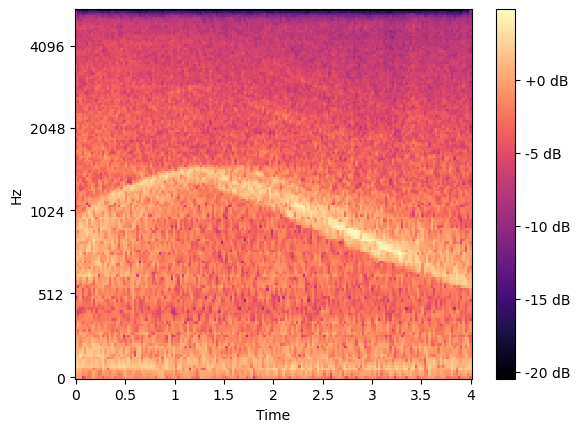

In [41]:
path = f"siren/{name}.wav"
y, sr = librosa.load(path, duration=4, sr=11080)

# extract a fixed length window
start_sample = 0  # starting at beginning
length_samples = time_steps * hop_length
window = y[start_sample:start_sample + length_samples]

# convert to PNG
mels = spectrogram_image(window, sr=sr, hop_length=hop_length, n_mels=n_mels)
mels2 = numpy.flip(mels, axis=0)
S_dB = librosa.power_to_db(mels, ref=numpy.max)
print(mels.shape)
fig, ax = plt.subplots()
img = specshow(mels, x_axis='time',
               y_axis='mel', sr=sr,
               fmax=sr/2, ax=ax, cmap='magma', hop_length=hop_length)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()
plt.close()


[[-100. -100. -100. ... -100. -100. -100.]
 [-100. -100. -100. ... -100. -100. -100.]
 [-100. -100. -100. ... -100. -100. -100.]
 ...
 [-100. -100. -100. ... -100. -100. -100.]
 [-100. -100. -100. ... -100. -100. -100.]
 [-100. -100. -100. ... -100. -100. -100.]]


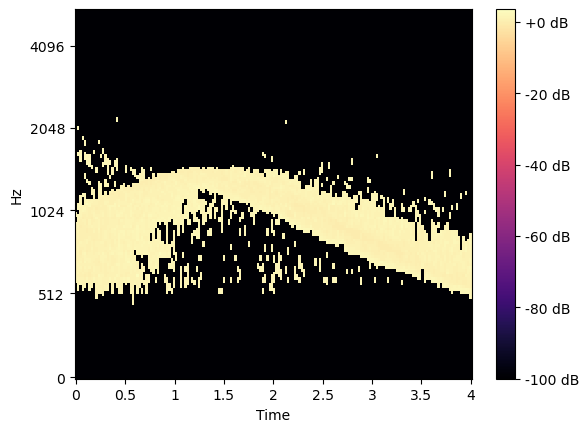

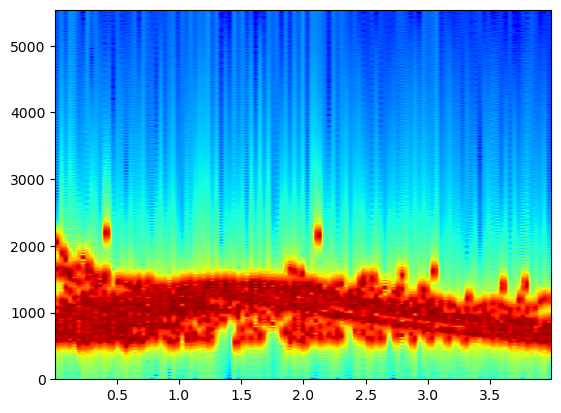

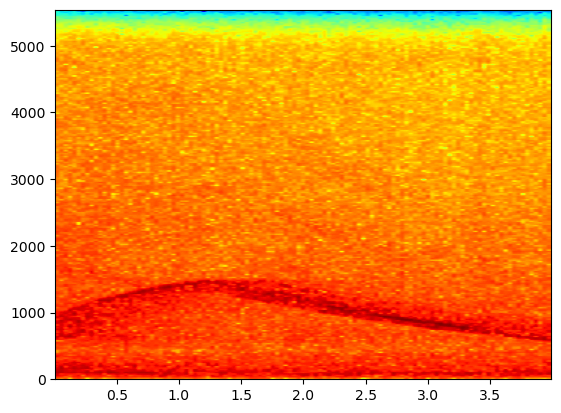

In [42]:
new = (np_img * 1.5  * (mels2 - mels2*1.2)) + np_img2
print(new)
fig, ax = plt.subplots()
new = numpy.flip(new, axis=0)
img = specshow(new, x_axis='time',
               y_axis='mel', sr=sr,
               fmax=sr/2, ax=ax, cmap='magma', hop_length=hop_length)
new = librosa.feature.inverse.mel_to_audio(new, sr=sr, hop_length=hop_length, n_fft=hop_length * 2)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
soundfile.write(f'test.wav', new, 10880)
fig2, ax2 = plt.subplots()
plt.specgram(new, Fs=sr, NFFT=hop_length*2, cmap='jet')
plt.show()
plt.specgram(y, Fs=sr, NFFT=hop_length*2, cmap='jet')
plt.show()

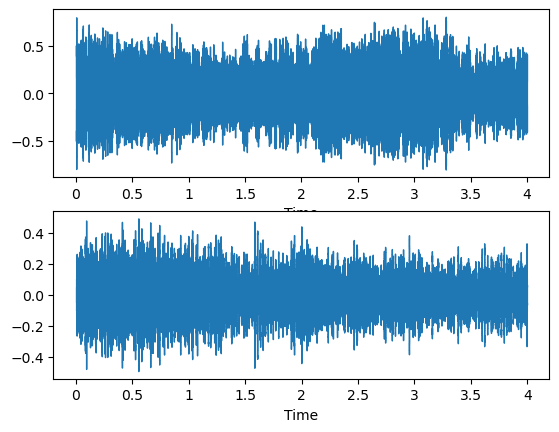

In [43]:
fig, (ax, ax2) = plt.subplots(nrows=2)
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(new, sr=sr, ax=ax2, marker='.', label='Full signal')